In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
X = np.array([50, 60, 70, 80, 90, 100]).reshape(-1,1) # Criar um array 2D, pois o sklearn espera um array 2D para o X
y = np.array([150, 180, 200, 230, 250, 280])

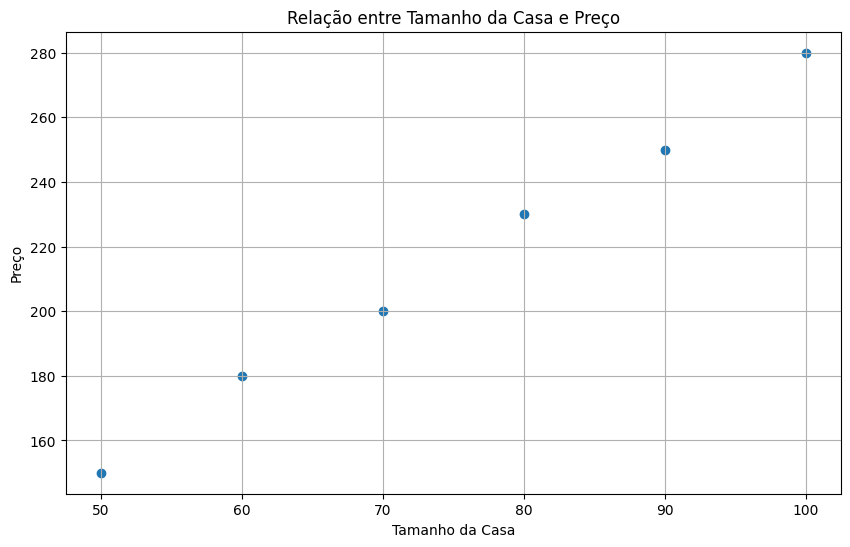

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title("Relação entre Tamanho da Casa e Preço")
plt.xlabel("Tamanho da Casa")
plt.ylabel("Preço")
plt.grid(True)
plt.show()

In [ ]:
regr = LinearRegression()
regr.fit(X,y)

LinearRegression()

In [ ]:
print("Coeficiente angular (inclinação):", regr.coef_[0])
print("Coeficiente linear (intercepto):", regr.intercept_)

Coeficiente angular (inclinação): 2.542857142857143
Coeficiente linear (intercepto): 24.285714285714278


In [ ]:
X_novo = np.array([[65], [75]]) # adiciona um novo array 2D para prever
y_pred = regr.predict(X_novo)

In [7]:
print(f"Previsão de preço para uma casa de 65m²: {y_pred[0]}")
print(f"Previsão de preço para uma casa de 75m²: {y_pred[1]}")

Previsão de preço para uma casa de 65m²: 189.57142857142858
Previsão de preço para uma casa de 75m²: 215.0


# **Dataset Preços de casas de Boston**

| Atributo       | Tipo          | Descrição                                                                 |
|----------------|---------------|--------------------------------------------------------------------------|
| **MedInc**     | `float`       | Renda média dos residentes (em dezenas de milhares de USD).              |
| **HouseAge**   | `float`       | Idade média das casas (em anos).                                         |
| **AveRooms**   | `float`       | Média de cômodos (quartos + outros) por residência.                      |
| **AveBedrms**  | `float`       | Média de quartos por residência.                                         |
| **Population** | `float`       | População total na área.                                                 |
| **AveOccup**   | `float`       | Média de ocupantes por residência.                                       |
| **Latitude**   | `float`       | Coordenada geográfica (latitude).                                        |
| **Longitude**  | `float`       | Coordenada geográfica (longitude).                                       |
| **MedHouseVal** (Target) | `float` | Valor mediano das casas (em centenas de milhares de USD). |

In [8]:
from sklearn.datasets import fetch_california_housing
claifornia = fetch_california_housing()
df = pd.DataFrame(claifornia.data, columns=claifornia.feature_names)
df['MedHouseVal'] = claifornia.target

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


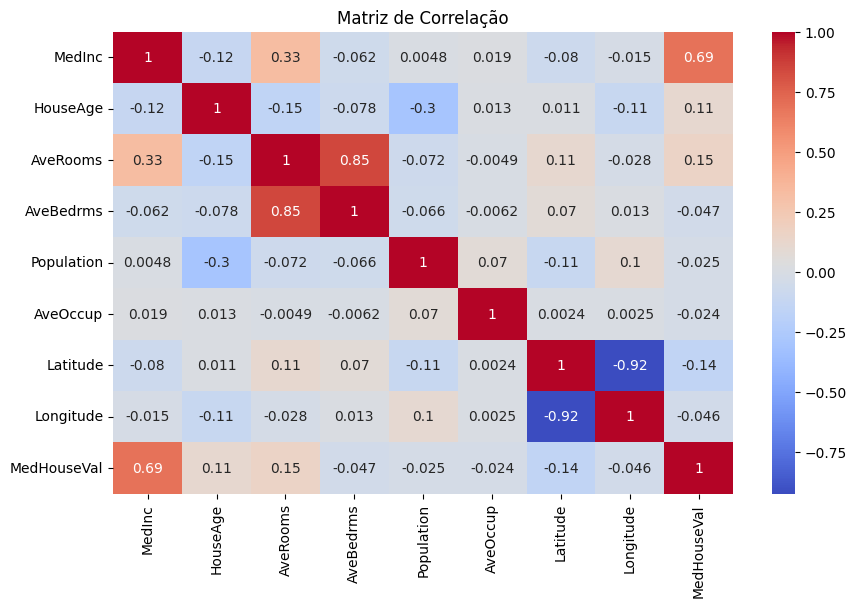

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [12]:
features = ['MedInc']
x= df[features]
y= df['MedHouseVal']


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_normalizado = scaler.fit_transform(x)

In [14]:
modelo = LinearRegression()
modelo.fit(x_normalizado, y)

LinearRegression()

In [15]:
print("Coeficiente angular (inclinação):")
for feature,coenf in zip(features, modelo.coef_):
    print(f"{feature}: {coenf}")
print('intercepto:', modelo.intercept_)

Coeficiente angular (inclinação):
MedInc: 0.7939893889648998
intercepto: 2.068558169089147


In [16]:
y_pred = modelo.predict(x_normalizado)

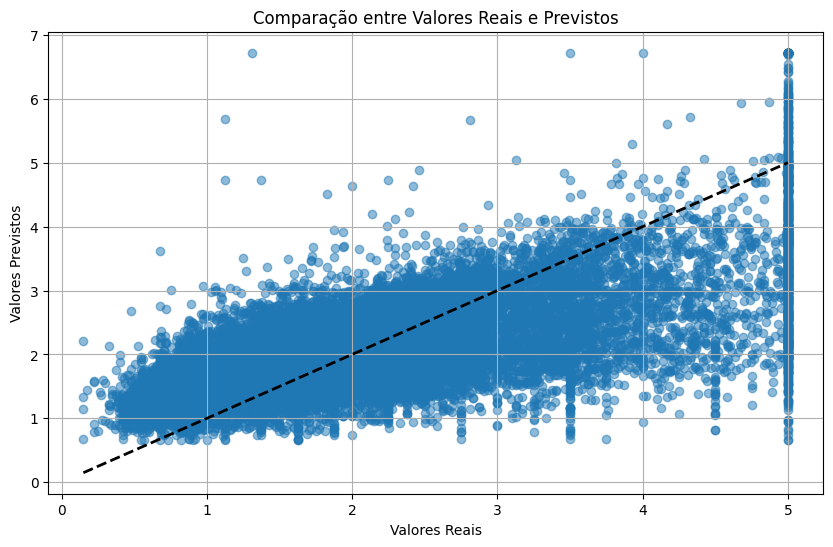

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.grid(True)
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [19]:
print("Erro quadratico:", mse)
print("Coeficiente de determinação (R²):", r2)

Erro quadratico: 0.7011311502929526
Coeficiente de determinação (R²): 0.47344749180719903


#

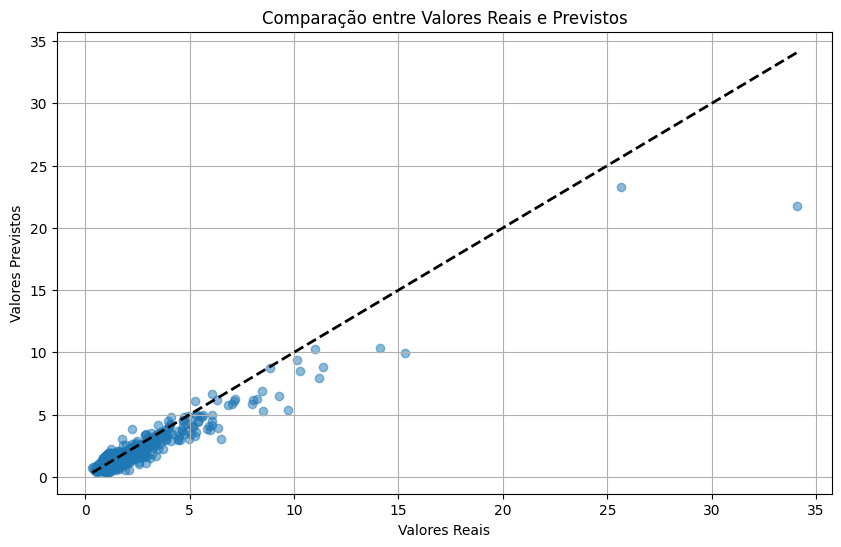

In [21]:
features = ['AveRooms']
x= df[features]
y= df['AveBedrms']
scaler = StandardScaler()
x_normalizado = scaler.fit_transform(x)
modelo = LinearRegression()
modelo.fit(x_normalizado, y)
plt.figure(figsize=(10,6))
plt.scatter(y, modelo.predict(x_normalizado), alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.grid(True)
plt.show()